## Company Bankruptcy Prediction
##### Summary: 
This bankruptcy prediction practice is taken from Kaggle at the URL: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction. The dataset has 95 predictor variables, the response variable is bankruptcy (1 for yes, 0 for no), and 6819 instances. The data was collected from the Taiwan Economic Journal from 1999 to 2009. 

##### Process:
I'll begin this analysis with data cleaning, so it is simple for the analysis, then have a section where I loop through several machine learning models. Following this I will demonstrate how you can test predictions if you manually wanted to test for predictions. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import RobustScaler # For scaling X
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Help at
# https://www.kaggle.com/code/eliqulu/company-bankruptcy-prediction
data=pd.read_csv('C:/Users/clays/Adv ML/data.csv')

In [2]:
#Removing warnings for when I do the ML models
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
# Changing the column names since I can't work with spaces between words
data.columns= [i.lower().strip().replace(' ', '_') for i in data.columns]
data.head()

bankrupt?  roa(c)_before_interest_and_depreciation_before_interest  \
0          1                                           0.370594         
1          1                                           0.464291         
2          1                                           0.426071         
3          1                                           0.399844         
4          1                                           0.465022         

   roa(a)_before_interest_and_%_after_tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   roa(b)_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   pre-tax_net_interest_rate  after-tax_net_interest_rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   non-industry_income_and_expenditure/revenue  ...  \
0                                     0.302646  ...   
1                                     0.303556  ...   
2                                     0.302035  ...   
3                                     0.303350  ...   
4                                     0.303475  ...   

   net_income_to_total_assets  total_assets_to_gnp_price  no-credit_interval  \
0                    0.716845                   0.009219            0.622879   
1                    0.795297                   0.008323            0.623652   
2                    0.774670                   0.040003            0.623841   
3                    0.739555                   0.003252            0.622929   
4                    0.795016                   0.003878            0.623521   

   gross_profit_to_sales  net_income_to_stockholder's_equity  \
0               0.601453                            0.827890   
1               0.610237                            0.839969   
2               0.601449                            0.836774   
3               0.583538                            0.834697   
4               0.598782                            0.839973   

   liability_to_equity  degree_of_financial_leverage_(dfl)  \
0             0.290202                            0.026601   
1             0.283846                            0.264577   
2             0.290189                            0.026555   
3             0.281721                            0.026697   
4             0.278514                            0.024752   

   interest_coverage_ratio_(interest_expense_to_ebit)  net_income_flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                           0.564663                 1   
4                                           0.575617                 1   

   equity_to_liability  
0             0.016469  
1             0.020794  
2           

Text(0.5, 1.0, 'Bankrupt')

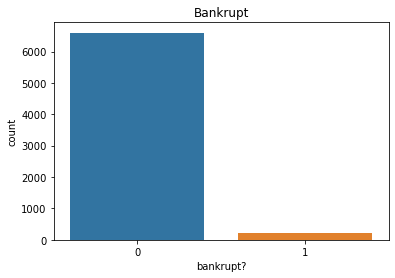

In [4]:
sns.countplot(x=data['bankrupt?'])
plt.title('Bankrupt')

In [5]:
X = data.iloc[:,1:] # Selecting all predictor variables
Y = data.iloc[:,[0]] # Selecting only the response variable
X.head()

roa(c)_before_interest_and_depreciation_before_interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         

   roa(a)_before_interest_and_%_after_tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   roa(b)_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   realized_sales_gross_margin  operating_profit_rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   pre-tax_net_interest_rate  after-tax_net_interest_rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   non-industry_income_and_expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   continuous_interest_rate_(after_tax)  ...  net_income_to_total_assets  \
0                              0.780985  ...                    0.716845   
1                              0.781506  ...                    0.795297   
2                              0.780284  ...                    0.774670   
3                              0.781241  ...                    0.739555   
4                              0.781550  ...                    0.795016   

   total_assets_to_gnp_price  no-credit_interval  gross_profit_to_sales  \
0                   0.009219            0.622879               0.601453   
1                   0.008323            0.623652               0.610237   
2                   0.040003            0.623841               0.601449   
3                   0.003252            0.622929               0.583538   
4                   0.003878            0.623521               0.598782   

   net_income_to_stockholder's_equity  liability_to_equity  \
0                            0.827890             0.290202   
1                            0.839969             0.283846   
2                            0.836774             0.290189   
3                            0.834697             0.281721   
4                            0.839973             0.278514   

   degree_of_financial_leverage_(dfl)  \
0                            0.026601   
1                            0.264577   
2                            0.026555   
3                            0.026697   
4                            0.024752   

   interest_coverage_ratio_(interest_expense_to_ebit)  net_income_flag  \
0                                           0.564050                 1   
1                                           0.570175                 1   
2                                           0.563706                 1   
3                                          

In [6]:
# Scaling the predictor variables
X.iloc[:,:] = RobustScaler().fit_transform(X)
X.head()

roa(c)_before_interest_and_depreciation_before_interest  \
0                                          -2.237820         
1                                          -0.650702         
2                                          -1.298101         
3                                          -1.742362         
4                                          -0.638315         

   roa(a)_before_interest_and_%_after_tax  \
0                               -2.525674   
1                               -0.402644   
2                               -1.133706   
3                               -2.024403   
4                               -0.398577   

   roa(b)_before_interest_and_depreciation_after_tax  operating_gross_margin  \
0                                          -2.578427               -0.337079   
1                                          -0.625530                0.314607   
2                                          -1.407442               -0.337614   
3                                          -1.663683               -1.667202   
4                                          -0.527555               -0.535581   

   realized_sales_gross_margin  operating_profit_rate  \
0                    -0.337006              -0.423237   
1                     0.317657              -0.608575   
2                    -0.343994              -1.315814   
3                    -1.673206              -2.573536   
4                    -0.536415              -0.391886   

   pre-tax_net_interest_rate  after-tax_net_interest_rate  \
0                  -2.987097                    -3.588770   
1                  -0.432258                    -0.472337   
2                  -5.493907                    -6.264244   
3                  -2.573477                    -2.597853   
4                  -0.505376                    -0.453344   

   non-industry_income_and_expenditure/revenue  \
0                                    -7.392276   
1                                     0.260163   
2                                   -12.532520   
3                                    -1.479675   
4                                    -0.424797   

   continuous_interest_rate_(after_tax)  ...  net_income_to_total_assets  \
0                             -3.856786  ...                   -3.156866   
1                             -0.765196  ...                   -0.515808   
2                             -8.014988  ...                   -1.210225   
3                             -2.337219  ...                   -2.392368   
4                             -0.503747  ...                   -0.525276   

   total_assets_to_gnp_price  no-credit_interval  gross_profit_to_sales  \
0                   1.633983           -1.880597              -0.337407   
1                   1.428737           -0.427692               0.314634   
2                   8.684444           -0.071798              -0.337700   
3                   0.267343           -1.787063              -1.667413   
4                   0.410510           -0.674068              -0.535752   

   net_income_to_stockholder's_equity  liability_to_equity  \
0                           -5.926656             2.535950   
1                           -0.539430             1.125074   
2                           -1.964374             2.532984   
3                           -2.890800             0.653418   
4                           -0.537879            -0.058557   

   degree_of_financial_leverage_(dfl)  \
0                           -1.700396   
1                         1948.484160   
2                           -2.076630   
3                           -0.913658   
4                          -16.850935   

   interest_coverage_ratio_(interest_expense_to_ebit)  net_income_flag  \
0                                          -2.122174               0.0   
1                                           8.693092               0.0   
2                                          -2.729675               0.0   
3                                          

In [7]:
#Train and Testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=42, stratify=Y)

### Machine Learning Models Ouputs:

In [8]:
models = [('Logist Regression', LogisticRegression()), 
          ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors = 1)), 
          ('Naive Bayes Gaussian', GaussianNB()), 
          ('Perceptron', Perceptron()), 
          ('Linear Support Vector Machine', LinearSVC()), 
          ('Decision Tree', DecisionTreeClassifier()), 
          ('XGBoost', XGBClassifier()),
          ('Random Forest', RandomForestClassifier(n_estimators=100))]

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = round(model.score(x_train, y_train) * 100, 2)
    print(name + " " + str(accuracy) +"%")

Logist Regression 96.77%
K-Nearest Neighbors 98.41%
Naive Bayes Gaussian 6.35%
Perceptron 66.48%
Linear Support Vector Machine 83.05%
Decision Tree 100.0%
XGBoost 100.0%
Random Forest 100.0%


### Making Predictions
If you wanted to make predictions on the result of a bankruptcy, this is the process you would follow:

In [10]:
# for name, model in models:
#     model.fit(x_train, y_train)
    # resp = input("Using " + name + "would you like to check for any predictions? (y/n)").lower()
    # if resp == 'y':
    #     input("Please list your values: ")
    #     col1 = eval(input(""))
    #     col2 = eval(input(""))
    #     ...
    #     col96= eval(input(""))
    #     # There are 95 columns if you don't include the response variable
    #     pred = int(model.predict([col1, col2, col3, ... col95]))
    #     if pred == 1:
    #         print("Your prediction is that you will be bankrupt under these circumstances.")
    #     else:
    #         print("Your prediction is that you will not be bankrupt under these circumstances.")